# 自动微分

In [32]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [2]:
x = tf.range(4, dtype=tf.float32)
print(x)

tf.Tensor([0. 1. 2. 3.], shape=(4,), dtype=float32)


In [3]:
x = tf.Variable(x)

In [4]:
with tf.GradientTape() as t:
    y =  tf.tensordot(x, x, axes=1)

print(y)
t.gradient(y, x) == 2*x



tf.Tensor(14.0, shape=(), dtype=float32)


<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [5]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)

print(y)
t.gradient(y, x) == 1

tf.Tensor(6.0, shape=(), dtype=float32)


<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [6]:
with tf.GradientTape() as t:
    y = x * x

print(y)
t.gradient(y, x) == 2*x

tf.Tensor([0. 1. 4. 9.], shape=(4,), dtype=float32)


<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [7]:
with tf.GradientTape() as t:
    y = x * x
    u = tf.stop_gradient(y)
    print(u)
    z = u * x

print(z)
# t.gradient(z, x) == u
t.gradient(y, x) == 2*x

tf.Tensor([0. 1. 4. 9.], shape=(4,), dtype=float32)
tf.Tensor([ 0.  1.  8. 27.], shape=(4,), dtype=float32)


<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [17]:
def f(a):
    print(a, 'xxxxx')
    b = a *2
    print(tf.norm(b), '=====')
    while tf.norm(b) < 1000:
        b = b * 2
    print(b, '=====')
    print(tf.reduce_sum(b), '=====')
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

a = tf.Variable(tf.random.normal(shape=(1,2)))
print(a)

with tf.GradientTape() as t:
    d = f(a)
    print(d, '=====')

t.gradient(d, a) == d/a
# 梯度计算是一次性的
# t.gradient(d, a)

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1.0680695 , 0.20908356]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1.0680695 , 0.20908356]], dtype=float32)> xxxxx
tf.Tensor(2.176684, shape=(), dtype=float32) =====
tf.Tensor([[1093.7031   214.10156]], shape=(1, 2), dtype=float32) =====
tf.Tensor(1307.8047, shape=(), dtype=float32) =====
tf.Tensor([[1093.7031   214.10156]], shape=(1, 2), dtype=float32) =====


<tf.Tensor: shape=(1, 2), dtype=bool, numpy=array([[ True,  True]])>

In [31]:
def g(a):
    b = tf.exp(a)
    n = 0  # 记录循环次数
    while tf.norm(b) < 100 and n < 1000:
        b = b * 4
        n += 1
    return b

a = tf.Variable(tf.random.normal(shape=(1,2)))
with tf.GradientTape() as t:
    d = g(a)
print(d, '=====')
grad = t.gradient(d, a)
print(grad, '=====')

# 验证导数：不应该用 ==，而是用 tf.abs(diff) < epsilon
theoretical_grad = d/tf.exp(a)  # 这个公式不正确

tf.abs(grad - theoretical_grad) < 1

tf.Tensor([[90.77298 46.80938]], shape=(1, 2), dtype=float32) =====
tf.Tensor([[90.77298 46.80938]], shape=(1, 2), dtype=float32) =====


<tf.Tensor: shape=(1, 2), dtype=bool, numpy=array([[False, False]])>

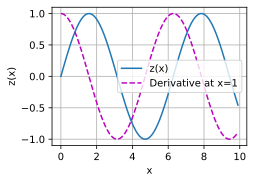

In [46]:
import numpy as np
def z(a):
    b = tf.sin(a)
    return b

x = np.arange(0, 10, 0.1)
x_var = tf.range(0, 10, 0.1)
# x_var = tf.Variable(x_var)  # 在x=1处求导
with tf.GradientTape() as t:
    t.watch(x_var)
    y = z(x_var)
grad = t.gradient(y, x_var)

# 画出sin(x)和在x=1处的切线
d2l.plot(x, [z(x), grad], 'x', 'z(x)', legend=['z(x)', 'Derivative at x=1'])